In [1]:
import numpy as np 
import pandas as pd

#### Import Data

In [2]:
test_df = pd.read_csv('/Users/maxsmith/Desktop/Coding/Kaggle/Insurance_Binary/test.csv')

In [3]:
train_df = pd.read_csv('/Users/maxsmith/Desktop/Coding/Kaggle/Insurance_Binary/train.csv')

#### Quick Look at train & stats

In [4]:
train_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
 11  Response              int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 1.0+ GB


In [6]:
train_df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07
mean,5.752398e+06,3.838356e+01,9.980220e-01,2.641869e+01,4.629966e-01,3.046137e+04,1.124254e+02,1.638977e+02,1.229973e-01
std,3.321149e+06,1.499346e+01,4.443120e-02,1.299159e+01,4.986289e-01,1.645475e+04,5.403571e+01,7.997953e+01,3.284341e-01
min,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.630000e+03,1.000000e+00,1.000000e+01,0.000000e+00
25%,2.876199e+06,2.400000e+01,1.000000e+00,1.500000e+01,0.000000e+00,2.527700e+04,2.900000e+01,9.900000e+01,0.000000e+00
50%,5.752398e+06,3.600000e+01,1.000000e+00,2.800000e+01,0.000000e+00,3.182400e+04,1.510000e+02,1.660000e+02,0.000000e+00
75%,8.628598e+06,4.900000e+01,1.000000e+00,3.500000e+01,1.000000e+00,3.945100e+04,1.520000e+02,2.320000e+02,0.000000e+00
max,1.150480e+07,8.500000e+01,1.000000e+00,5.200000e+01,1.000000e+00,5.401650e+05,1.630000e+02,2.990000e+02,1.000000e+00


In [7]:
train_df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

#### Splitting Columns into Numeric and Categorical

In [8]:
num_col = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_col = train_df.select_dtypes(include=['object']).columns.tolist()

In [9]:
cat_col

['Gender', 'Vehicle_Age', 'Vehicle_Damage']

In [10]:
num_col

['id',
 'Age',
 'Driving_License',
 'Region_Code',
 'Previously_Insured',
 'Annual_Premium',
 'Policy_Sales_Channel',
 'Vintage',
 'Response']

In [11]:
print("Duplicates in Train Dataset: ",train_df.duplicated().sum())

Duplicates in Train Dataset:  0


In [12]:
print("Duplicates in Test Dataset: ",test_df.duplicated().sum())

Duplicates in Test Dataset:  0


In [13]:
print("Checking Null Values in Train Dataset")
missing_data = train_df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_data["% of Missing Values"] = round((missing_data["Total No. of Missing Values"]/len(train_df))*100,2)
missing_data

Checking Null Values in Train Dataset


,Total No. of Missing Values,% of Missing Values
id,0,0.0
Gender,0,0.0
Age,0,0.0
Driving_License,0,0.0
Region_Code,0,0.0
Previously_Insured,0,0.0
Vehicle_Age,0,0.0
Vehicle_Damage,0,0.0
Annual_Premium,0,0.0
Policy_Sales_Channel,0,0.0


### Visualisation

In [ ]:
## Let's look at the target variable as 

/var/folders/j6/wgmktnvs1yz0xntx2vt1_73h0000gn/T/ipykernel_94657/381518020.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='Set3')


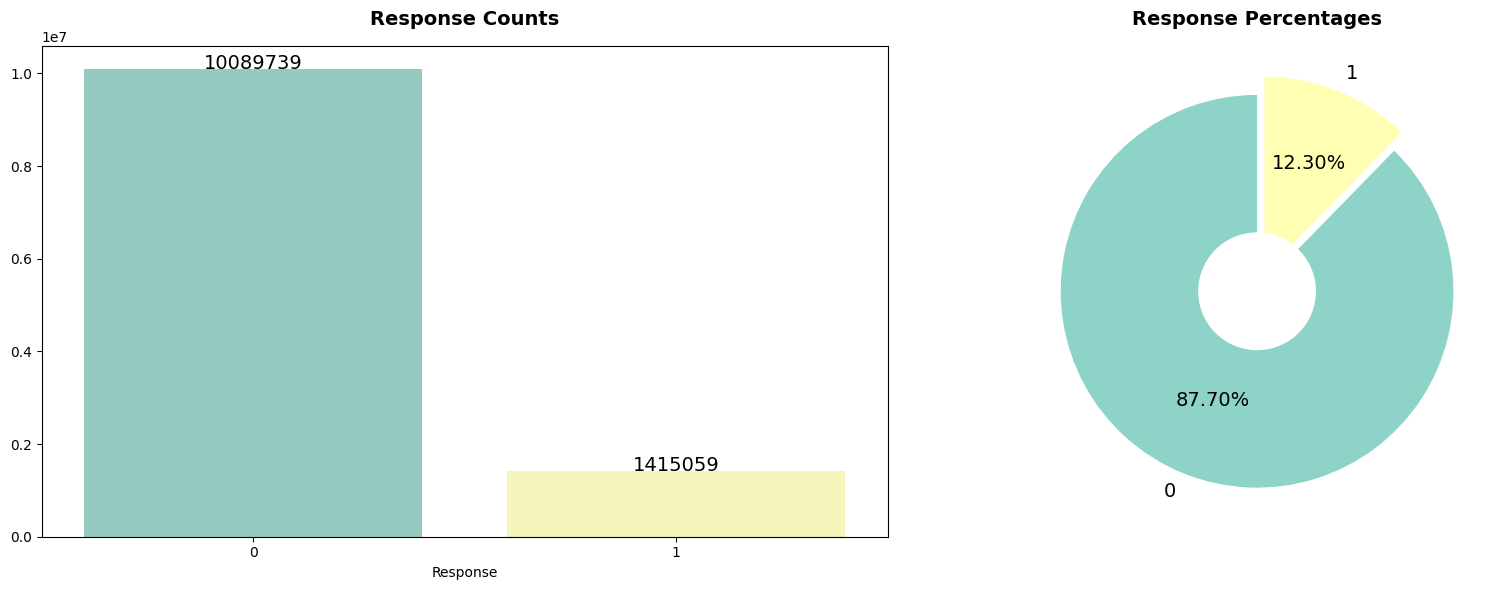

In [33]:
def plot_counts_and_percentages(data, column):
    plt.figure(figsize=(17,6))

    # Bar plot for counts
    plt.subplot(1,2,1)
    counts = data[column].value_counts()
    sns.barplot(x=counts.index, y=counts.values, palette='Set3')
    plt.title(f"{column} Counts", fontweight="black", size=14, pad=15)
    for i, v in enumerate(counts.values):
        plt.text(i,v,v,ha="center",fontsize=14)

    # Pie chart for percentages
    plt.subplot(1, 2, 2)
    colors = sns.color_palette('Set3', len(counts))
    explode = [0] * len(counts)  # No slice will be exploded by default
    explode[-1] = 0.1  # Explode the last slice
    plt.pie(counts, labels=counts.index, autopct="%.2f%%", textprops={"size": 14},
            colors=colors, explode=explode, startangle=90)
    center_circle = plt.Circle((0, 0), 0.3, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)
    plt.title(f"{column} Percentages", fontweight="black", size=14, pad=15)

    # Display the plots
    plt.tight_layout()
    plt.show()

# Implement usage on response (target variable):
plot_counts_and_percentages(train_df, "Response")

In [28]:
### only 12.3% of customers positively responded, so the data is not evenly distrubuted. y = imbalanced

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

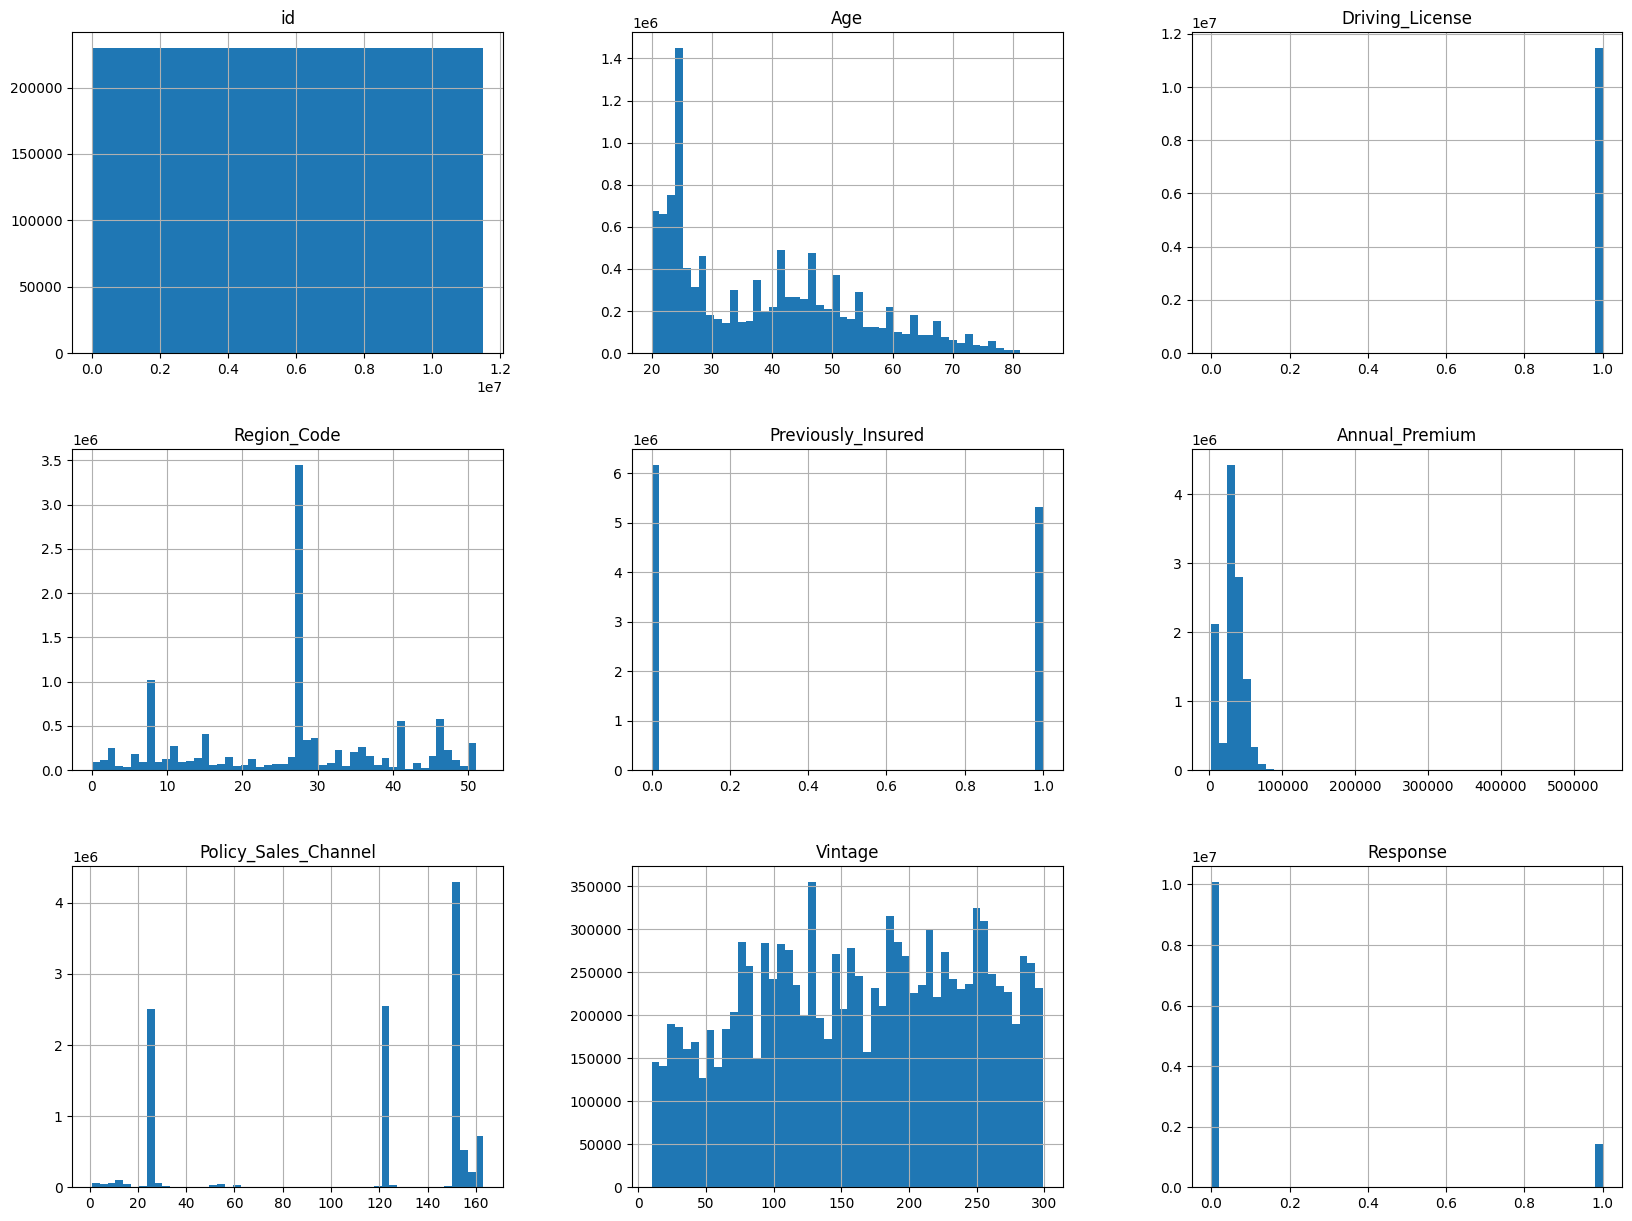

In [15]:
train_df.hist(bins=50,figsize=(20,15))
plt.show

In [16]:
### Firstly can see the responses are skewed, most did not respond positively to the cross-selling

#### Creating a scatter matrix of the numeric features to investigate correlations

In [17]:
from pandas.plotting import scatter_matrix

In [18]:
# scatter_matrix(train_df[num_col], figsize=(12,8))

<Axes: >

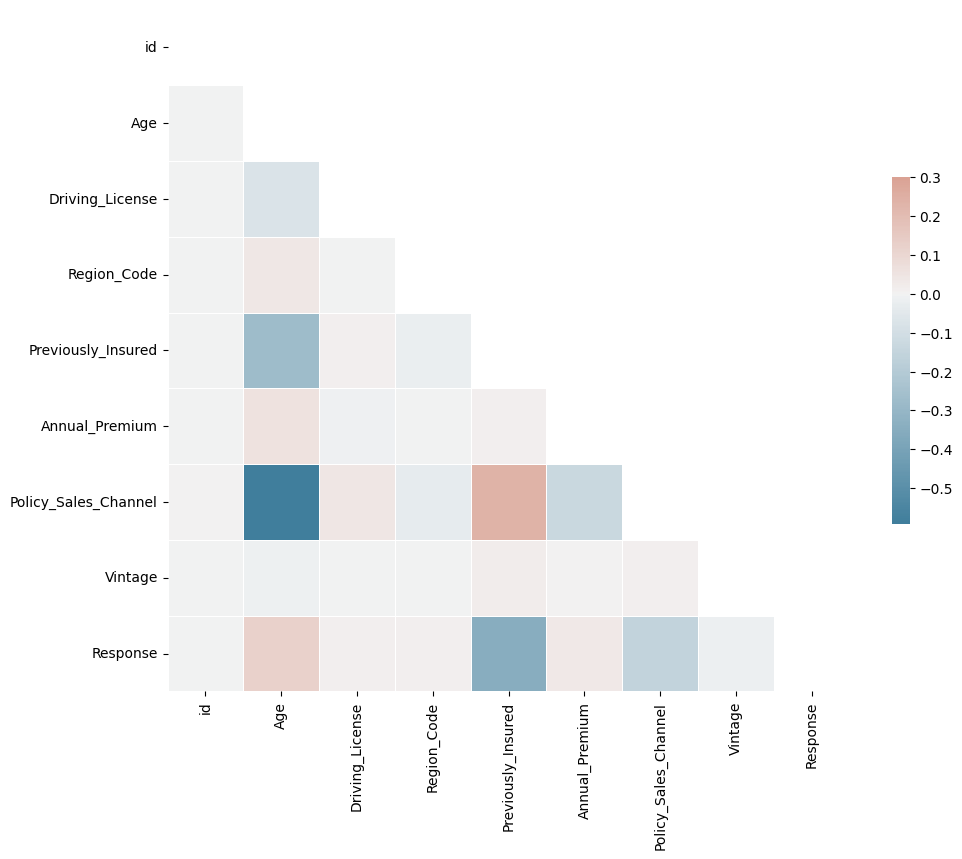

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric values
train_num_df = train_df[num_col]

# Compute the correlation matrix
corr = train_num_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Looks like Age could be particularly impactful.. Let's look at those in more depth

<Axes: xlabel='Response', ylabel='Age'>

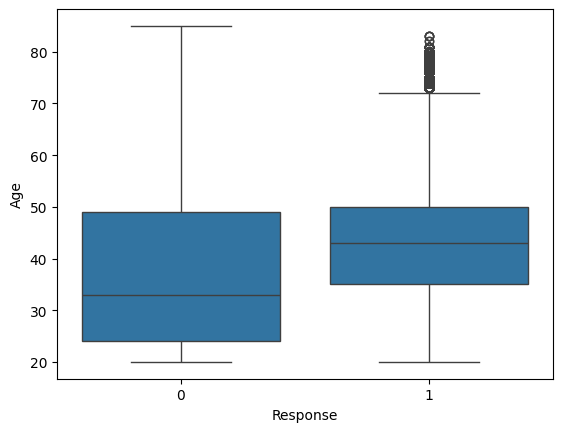

In [22]:
sns.boxplot(data=train_num_df, x="Response", y="Age")

In [34]:
### Split the dataset into x and y

In [35]:
X = train_df.drop(['Response'], axis=1)
y = train_df[['Response']]

In [36]:
X

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294
...,...,...,...,...,...,...,...,...,...,...,...
11504793,11504793,Male,48,1,6.0,0,1-2 Year,Yes,27412.0,26.0,218
11504794,11504794,Female,26,1,36.0,0,< 1 Year,Yes,29509.0,152.0,115
11504795,11504795,Female,29,1,32.0,1,< 1 Year,No,2630.0,152.0,189
11504796,11504796,Female,51,1,28.0,0,1-2 Year,Yes,48443.0,26.0,274


In [37]:
y

,Response
0,0
1,1
2,0
3,0
4,0
...,...
11504793,0
11504794,1
11504795,0
11504796,1


### Pre-processing

In [38]:
# Part 1: One-Hot Encoding and Tracking Columns

In [43]:
# Identify numerical and categorical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

if cat_cols: # Check if there are any categorical columns
    # Apply one-hot encoding to categorical columns using get_dummies
    X_encoded = pd.get_dummies(X[cat_cols], drop_first=True)
    test_df_encoded = pd.get_dummies(test_df[cat_cols], drop_first=True)

    # Ensure the columns in test_df_encoded match those in X_encoded
    test_df_encoded = test_df_encoded.reindex(columns=X_encoded.columns, fill_value=0)

    # Combine original numerical columns and the one-hot-encoded columns
    X = pd.concat([X[num_cols], X_encoded], axis=1)
    test_df = pd.concat([test_df[num_cols], test_df_encoded], axis=1)

    # Convert boolean columns to integers (0s & 1s)
    X = X.applymap(lambda x: 1 if x is True else (0 if x is False else x))
    test_df = test_df.applymap(lambda x: 1 if X is True else (0 if x is False else x))

    # Update num_cols and cat_cols
    num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
    cat_cols = X.select_dtypes(include=['uint8']).columns.tolist()
else:
    print("No categorical columns found in the dataset")
    X = X[num_cols]
    test_df = test_df[num_cols]

print("One-Hot Encoded Train DataFrame:")
print(X)
print("\nOne-Hot Encoded Test DataFrame:")
print(test_df)

print("\nUpdated Numerical Columns:")
print(num_cols)
print("\nUpdated Categorical Columns:")
print(cat_cols)

No categorical columns found in the dataset
One-Hot Encoded Train DataFrame:
                id  Age  Driving_License  Region_Code  Previously_Insured  \
0                0   21                1         35.0                   0   
1                1   43                1         28.0                   0   
2                2   25                1         14.0                   1   
3                3   35                1          1.0                   0   
4                4   36                1         15.0                   1   
...            ...  ...              ...          ...                 ...   
11504793  11504793   48                1          6.0                   0   
11504794  11504794   26                1         36.0                   0   
11504795  11504795   29                1         32.0                   1   
11504796  11504796   51                1         28.0                   0   
11504797  11504797   25                1         28.0                   1   

In [44]:
# Part 2: Scaling the Numerical Columns

In [46]:
from sklearn.preprocessing import StandardScaler

# Apply standard scaling to numerical columns
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])
test_df[num_cols] = scaler.transform(test_df[num_cols])

# Clean feature names to ensure they do not contain prohibited characters
X.columns = [col.replace('[', '_').replace(']', '_').replace('<', '_') for col in X.columns]
test_df.columns = [col.replace('[', '_').replace(']', '_').replace('<', '_') for col in test_df.columns]

print("Scaled Train DataFrame:")
print(X)
print("\nScaled Test DataFrame:")
print(test_df)

Scaled Train DataFrame:
                id       Age  Driving_License  Region_Code  \
0        -1.732051 -1.159410         0.044519     0.660528   
1        -1.732050  0.307897         0.044519     0.121718   
2        -1.732050 -0.892627         0.044519    -0.955902   
3        -1.732050 -0.225669         0.044519    -1.956550   
4        -1.732049 -0.158974         0.044519    -0.878929   
...            ...       ...              ...          ...   
11504793  1.732049  0.641376         0.044519    -1.571685   
11504794  1.732050 -0.825931         0.044519     0.737501   
11504795  1.732050 -0.625844         0.044519     0.429609   
11504796  1.732050  0.841463         0.044519     0.121718   
11504797  1.732051 -0.892627         0.044519     0.121718   

          Previously_Insured  Annual_Premium  Policy_Sales_Channel   Vintage  \
0                  -0.928539        2.105145              0.214202  0.288852   
1                  -0.928539        1.728962             -1.599414  1.5

### Train Test Split

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=69)

## Modelling

### Naive Gauessian Bayes

In [49]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test set
test_preds = nb_model.predict(X_test)
print("Test Set Classification Report:")
print(classification_report(y_test, test_preds))

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, test_preds)
print(f"Test Set Accuracy: {test_accuracy:.4f}")

/Users/maxsmith/my_env/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.69      0.81   2017466
           1       0.29      0.90      0.43    283494

    accuracy                           0.71   2300960
   macro avg       0.63      0.79      0.62   2300960
weighted avg       0.89      0.71      0.76   2300960

Test Set Accuracy: 0.7118


In [53]:
#!pip install xgboost

In [58]:
import xgboost as xgb

# Initialise and train XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
test_preds = xgb_model.predict(X_test)

# Print calssification report
print("Test Set Classification Report:")
print(classification_report(y_test,test_preds))

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, test_preds)
print(f"Test Set Accuracy: {test_accuracy:.4f}")

/Users/maxsmith/my_env/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [18:46:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94   2017466
           1       0.58      0.09      0.15    283494

    accuracy                           0.88   2300960
   macro avg       0.73      0.54      0.54   2300960
weighted avg       0.85      0.88      0.84   2300960

Test Set Accuracy: 0.8798


### Tune the Hyperparameters

In [61]:
#!pip install optuna

In [60]:
import optuna
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# # Assuming X_train, X_test, y_train, and y_test are already defined
# # Example:
# # X_train = pd.DataFrame(...) # Your training feature matrix
# # X_test = pd.DataFrame(...)  # Your test feature matrix
# # y_train = pd.Series(...)    # Your training target variable
# # y_test = pd.Series(...)     # Your test target variable

# # Standardize the numerical features

# Define the objective function for Optuna
def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_loguniform('gamma', 1e-3, 1e-1),
    }
    
    xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', **param)
    xgb_model.fit(X_train, y_train)
    
    preds = xgb_model.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    return accuracy

# Create an Optuna study and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

# Get the best hyperparameters
best_params = study.best_params
print(f"Best parameters: {best_params}")

# Train the final model with the best hyperparameters
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', **best_params)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
test_preds = xgb_model.predict(X_test)

# Print classification report
print("Test Set Classification Report:")
print(classification_report(y_test, test_preds))

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, test_preds)
print(f"Test Set Accuracy: {test_accuracy:.4f}")

[I 2024-07-07 18:50:54,188] A new study created in memory with name: no-name-2dd8a6fe-4f3d-408d-bd07-2048d53f2a5d
/var/folders/j6/wgmktnvs1yz0xntx2vt1_73h0000gn/T/ipykernel_94657/945691218.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
/var/folders/j6/wgmktnvs1yz0xntx2vt1_73h0000gn/T/ipykernel_94657/945691218.py:23: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/var/folders/j6/wgmktnvs1yz0xntx2vt1_73h0000gn/T/ipykernel_94657/945691218.py:24: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https:/

Best parameters: {'max_depth': 10, 'learning_rate': 0.09596575691102782, 'n_estimators': 805, 'min_child_weight': 1, 'subsample': 0.8215384759202986, 'colsample_bytree': 0.553706422481063, 'gamma': 0.04841136437026109}


/Users/maxsmith/my_env/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [19:08:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94   2017466
           1       0.56      0.13      0.21    283494

    accuracy                           0.88   2300960
   macro avg       0.73      0.56      0.57   2300960
weighted avg       0.85      0.88      0.85   2300960

Test Set Accuracy: 0.8805


### Final Model Accuracy and Confusion Matrix

In [64]:
# Print classification report
print("Test Set Classification Report:")
print(classification_report(y_test, test_preds))

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, test_preds)
print(f"Test Set Accuracy: {test_accuracy:.4f}")

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94   2017466
           1       0.56      0.13      0.21    283494

    accuracy                           0.88   2300960
   macro avg       0.73      0.56      0.57   2300960
weighted avg       0.85      0.88      0.85   2300960

Test Set Accuracy: 0.8805


In [ ]:
## ..to Improve.. 
# Train further models and compare their accuracy
# stacking multiple models into an ensemble model
# conduct feature engineering
# look into feature importance
# use neural networks